In [514]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [515]:
# Reading data
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [516]:
#checking data shape
data.shape

(1460, 81)

In [517]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [518]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [519]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

**Data Cleaning**

Removing id column as each row has different value so it wont contribute to our analysis

In [520]:
data.drop('Id', inplace=True, axis=1)

In [521]:
data.isnull().sum()


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Deleting columns with more than 80% null values

In [522]:
drop_cols = data.columns[ (data.isna().sum()/data.shape[0]) > 0.8 ]
data.drop(drop_cols, axis=1, inplace=True)
data.shape

(1460, 76)

Lets remove the columns where 80% rows have the same value (as they will create bias)

In [523]:
for col in data.columns:
  print("=========== " + col + "=============")
  print(data[col].value_counts(normalize=True) * 100)

=========== MSSubClass=============
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
=========== MSZoning=============
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
=========== LotFrontage=============
60.0     11.906744
70.0      5.828476
80.0      5.745212
50.0      4.746045
75.0      4.412989
           ...    
137.0     0.083264
141.0     0.083264
38.0      0.083264
140.0     0.083264
46.0      0.083264
Name: LotFrontage, Length: 110, dtype: float64
=========== LotArea=============
7200     1.712329
9600     1.643836
6000     1.164384
9000     0.958904
8400     0.958904
           ...   
14601    0.068493
13682    0.068493
4058     0.068493
17104    0.068493


We see some columns have same value in more than 80% of the rows. This will create bias. So we will delete such columns

In [524]:
deletable_cols = ["SaleCondition", "SaleType", "MiscVal", "PoolArea", "ScreenPorch", "3SsnPorch", 
                  "EnclosedPorch", "GarageCond", "GarageQual", "Functional", "KitchenAbvGr", 
                  "BsmtHalfBath", "LowQualFinSF", "Electrical", "CentralAir", "Heating", 
                  "BsmtFinSF2", "BsmtFinType2", "BsmtCond", "ExterCond", "RoofMatl", "BldgType",
                  "Condition2", "Condition1", "LandSlope", "Utilities","LandContour", "Street"]   
data.drop(deletable_cols,axis=1, inplace=True)

In [525]:
data.shape

(1460, 48)

Dividing data into categorical and numerical columns

In [526]:
numerical_cols = data._get_numeric_data().columns.to_list()
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice']

In [527]:
numerical_cols = data._get_numeric_data().columns.to_list()
categorical_cols = set(data.columns.to_list()) - set(numerical_cols)
categorical_cols = list(categorical_cols)
categorical_cols

['Exterior2nd',
 'MSZoning',
 'RoofStyle',
 'MasVnrType',
 'GarageFinish',
 'BsmtQual',
 'PavedDrive',
 'ExterQual',
 'GarageType',
 'LotConfig',
 'HouseStyle',
 'Neighborhood',
 'BsmtFinType1',
 'BsmtExposure',
 'KitchenQual',
 'HeatingQC',
 'FireplaceQu',
 'Exterior1st',
 'Foundation',
 'LotShape']

Checking for outliers

In [528]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [529]:
for col in numerical_cols:
  lowerbound,upperbound = outlier_treatment(data[col])
  print(col)
  percentage_oulier = (len(data[(data[col] > upperbound) | (data[col] < lowerbound)])/data.shape[0]) * 100
  print(percentage_oulier)

MSSubClass
7.054794520547945
LotFrontage
0.0
LotArea
4.726027397260274
OverallQual
0.136986301369863
OverallCond
8.561643835616438
YearBuilt
0.4794520547945206
YearRemodAdd
0.0
MasVnrArea
0.0
BsmtFinSF1
0.4794520547945206
BsmtUnfSF
1.9863013698630139
TotalBsmtSF
4.178082191780822
1stFlrSF
1.36986301369863
2ndFlrSF
0.136986301369863
GrLivArea
2.1232876712328768
BsmtFullBath
0.0684931506849315
FullBath
0.0
HalfBath
0.0
BedroomAbvGr
2.3972602739726026
TotRmsAbvGrd
2.054794520547945
Fireplaces
0.3424657534246575
GarageYrBlt
0.0
GarageCars
0.3424657534246575
GarageArea
1.4383561643835616
WoodDeckSF
2.191780821917808
OpenPorchSF
5.273972602739726
MoSold
0.0
YrSold
0.0
SalePrice
4.178082191780822


In [530]:
#removing salesprice from list as it is target
numerical_cols.pop(-1)

'SalePrice'

**Imputing null values**

In [531]:
data.columns[data.isnull().any()] 
nullVals = data.isnull().sum()/len(data)*100
nullVals = nullVals[nullVals>0]
nullVals.sort_values(inplace=True, ascending=False)
nullVals

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
dtype: float64

As per the data definition, missing values in some categorical columns may not mean that the data is not present, it may mean that that facility is not there in the house. Fox example missing fence or garage. Let us combine nulls in such columns into a new category called 'Unavailable'. 

In [532]:
meaningfullNulls = ["FireplaceQu", "GarageType", "GarageFinish", "BsmtExposure", "BsmtQual", "BsmtFinType1", "MasVnrType"] 

In [533]:
for i in meaningfullNulls:
    data[i].fillna("Unavailable", inplace=True)

In [534]:
data.columns[data.isnull().any()] 
nullVals = data.isnull().sum()/len(data)*100
nullVals = nullVals[nullVals>0]
nullVals.sort_values(inplace=True, ascending=False)
nullVals

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

The above three are numerical cols. lets deal with them

LotFrontage is distance of street connected to property. we can replace that with neighboring properties as values will be similar. Rest two columns we will replace with median because there are outliers in the data

In [535]:
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

In [536]:
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
LotShape        0
LotConfig       0
Neighborhood    0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
PavedDrive      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

**EDA**

Exterior2nd


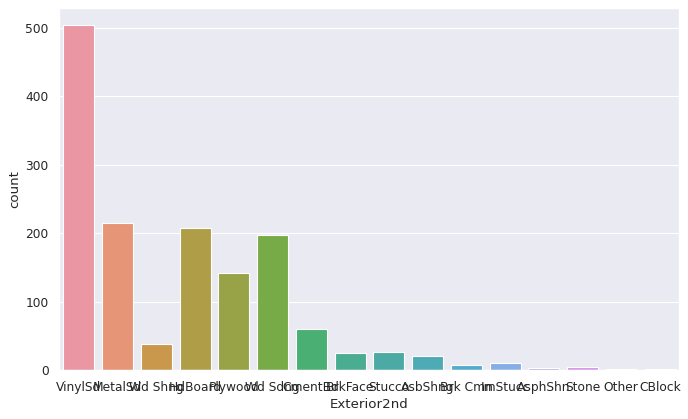

MSZoning


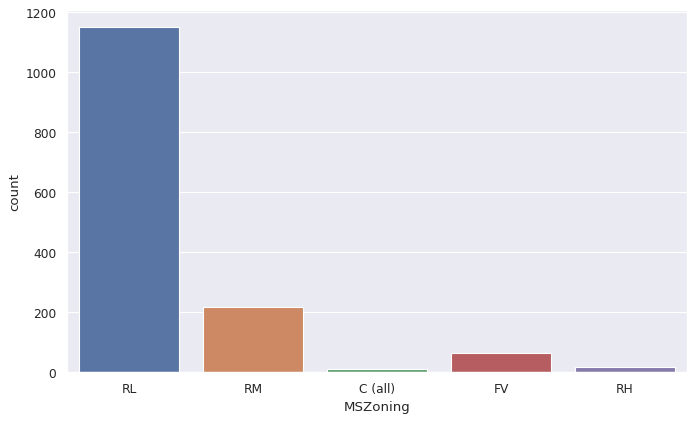

RoofStyle


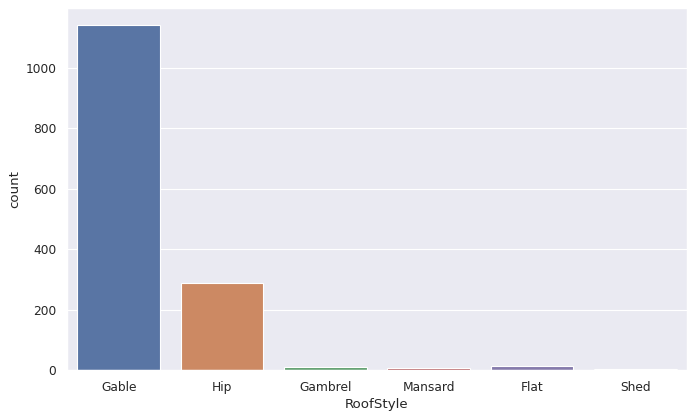

MasVnrType


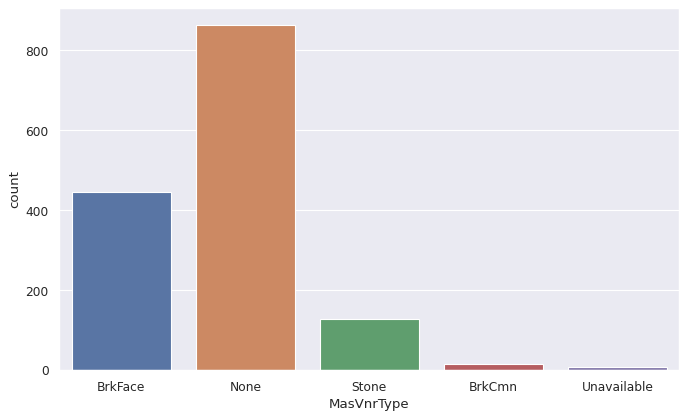

GarageFinish


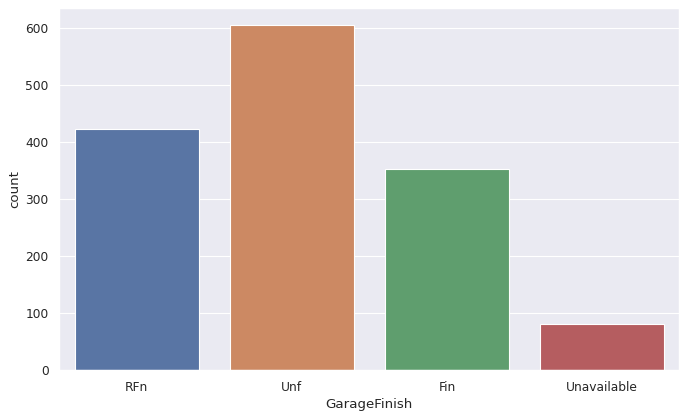

BsmtQual


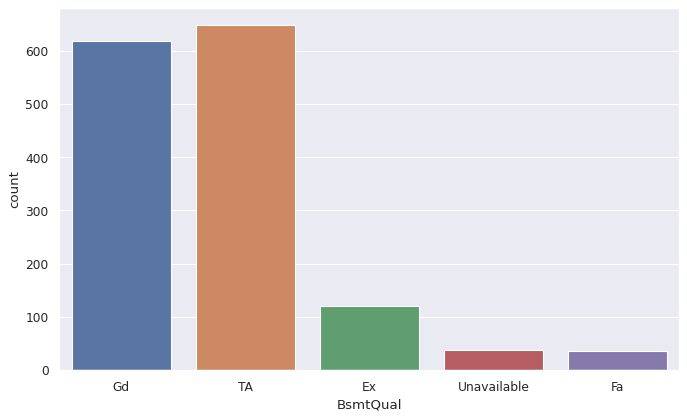

PavedDrive


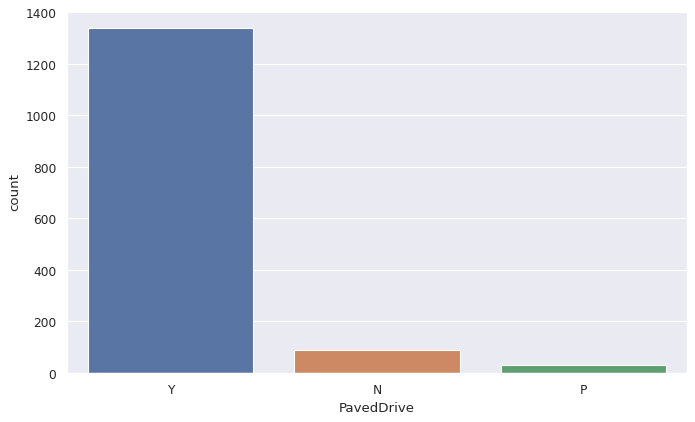

ExterQual


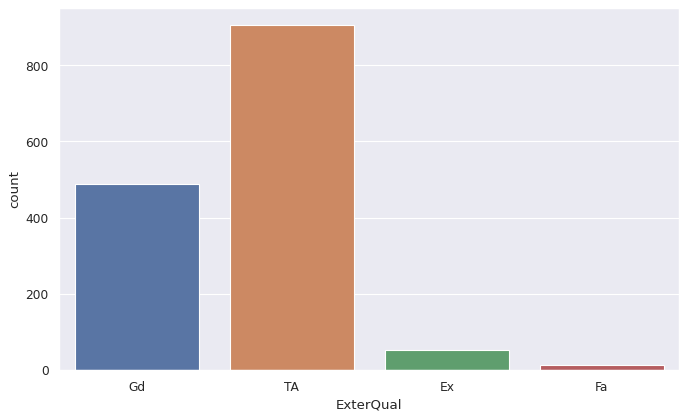

GarageType


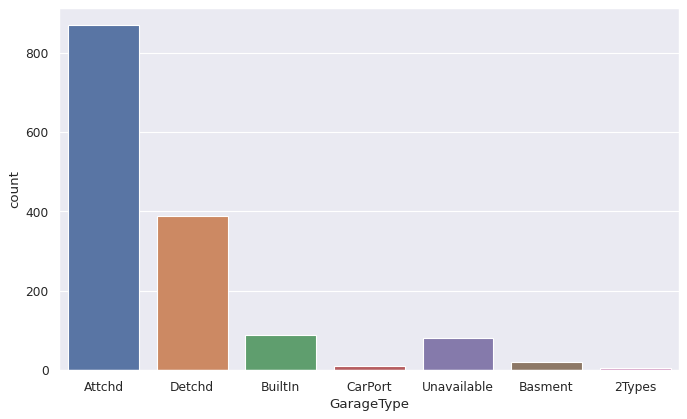

LotConfig


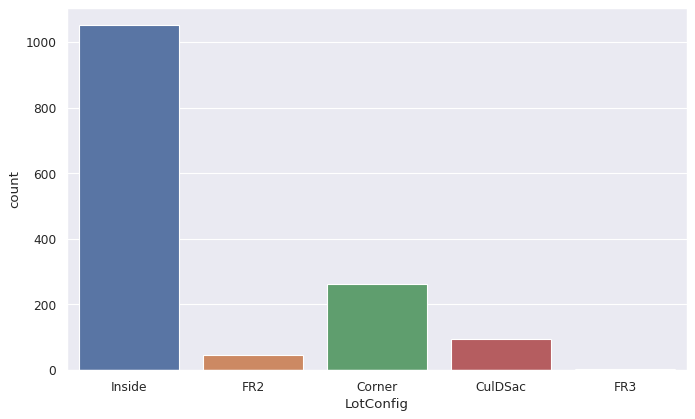

HouseStyle


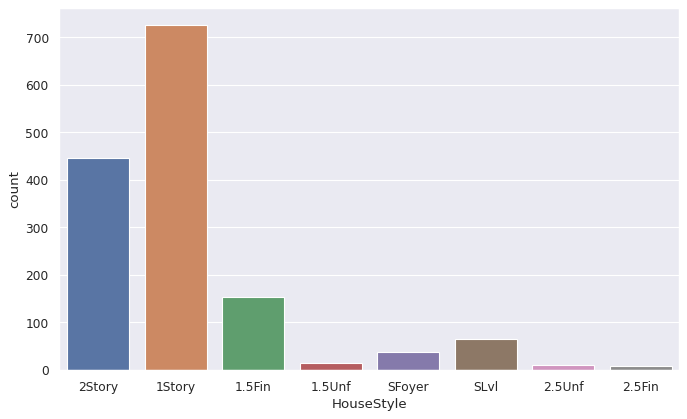

Neighborhood


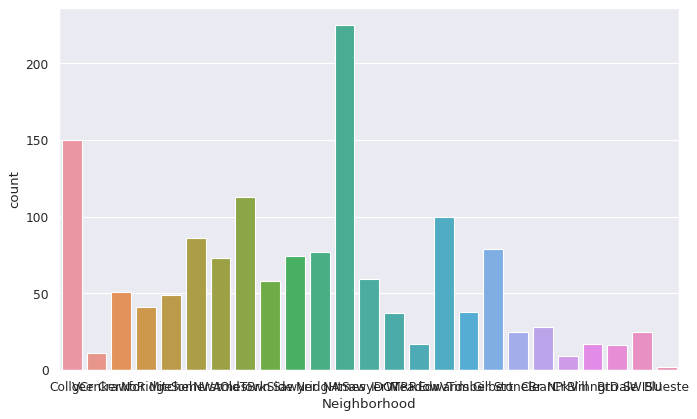

BsmtFinType1


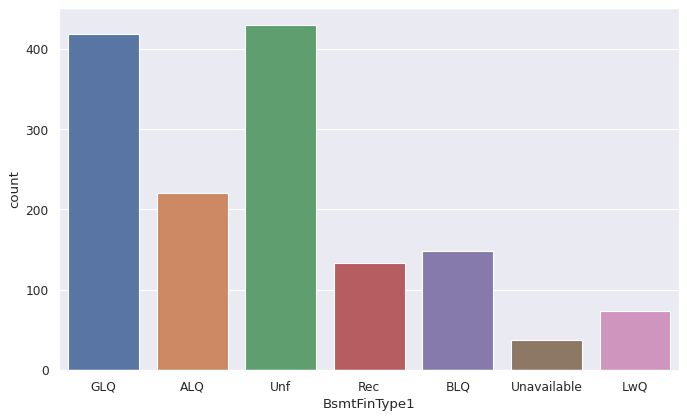

BsmtExposure


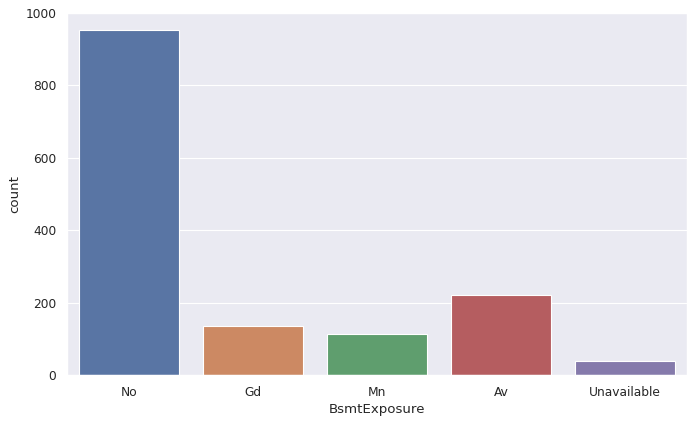

KitchenQual


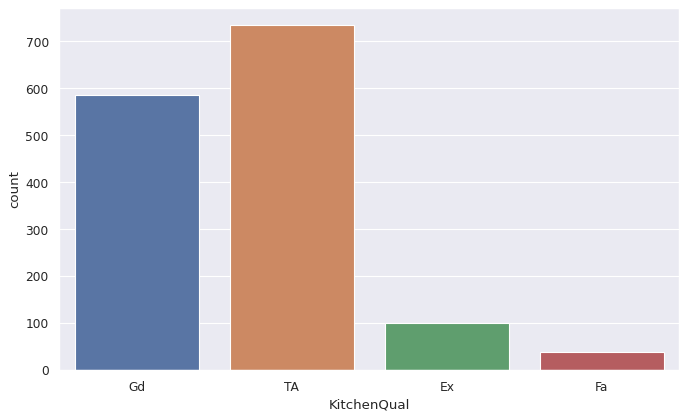

HeatingQC


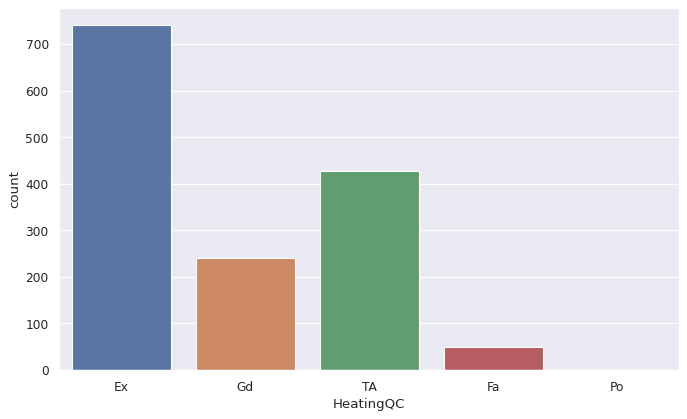

FireplaceQu


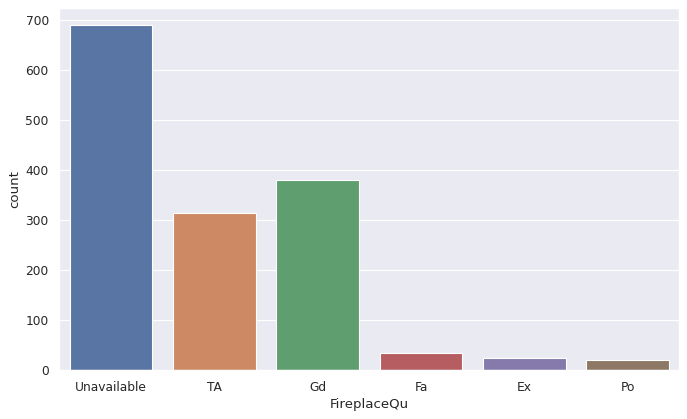

Exterior1st


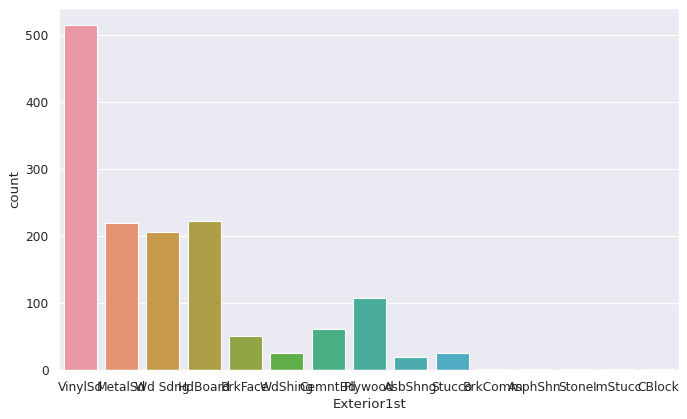

Foundation


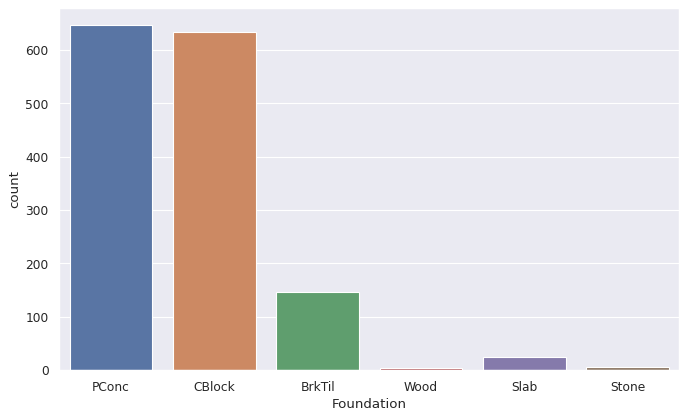

LotShape


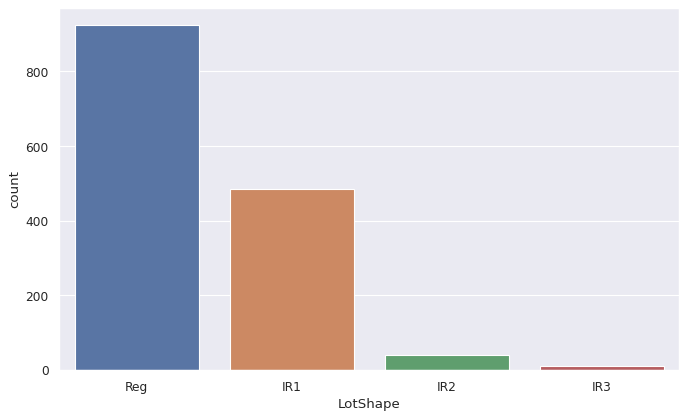

In [406]:
for col in categorical_cols:
  figure(figsize=(10, 6), dpi=80)
  print(col)
  sns.countplot(x=col, data= data)
  plt.show()

Exterior2nd


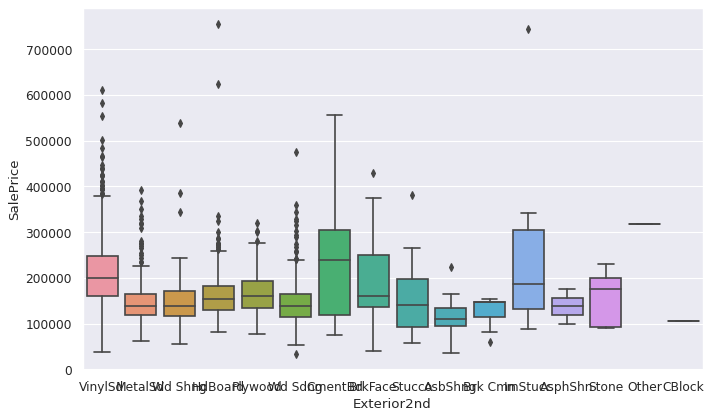

MSZoning


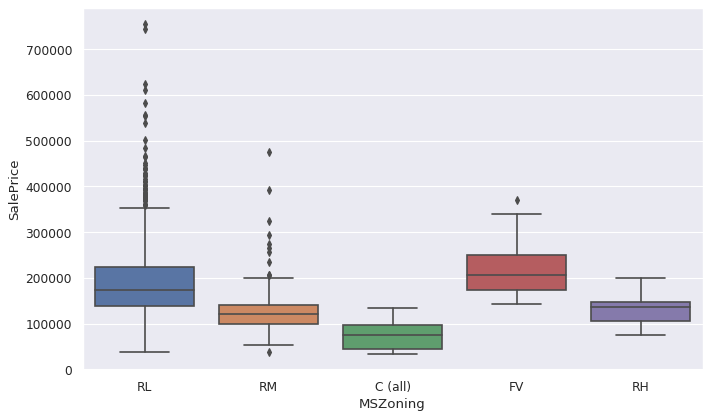

RoofStyle


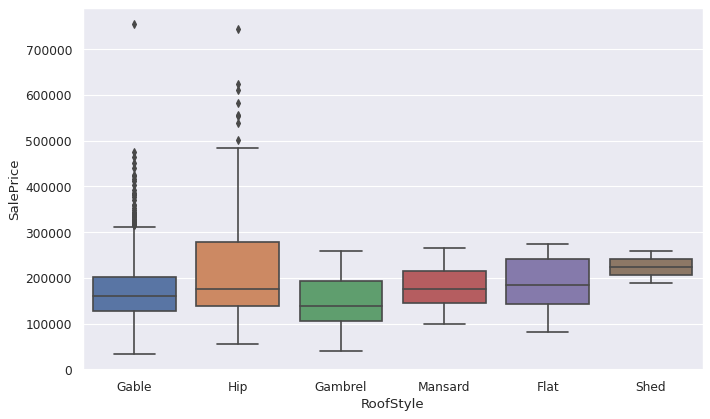

MasVnrType


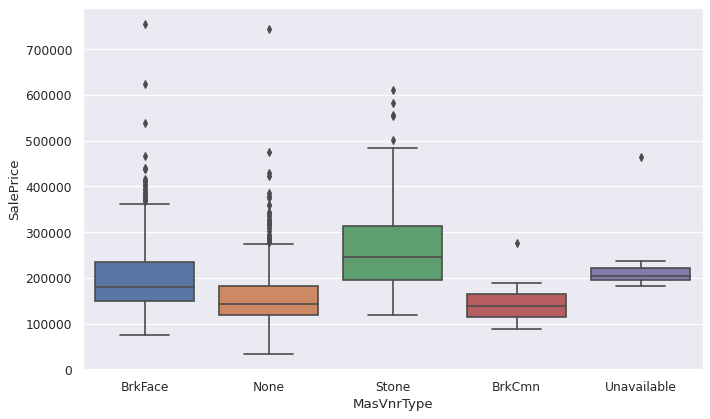

GarageFinish


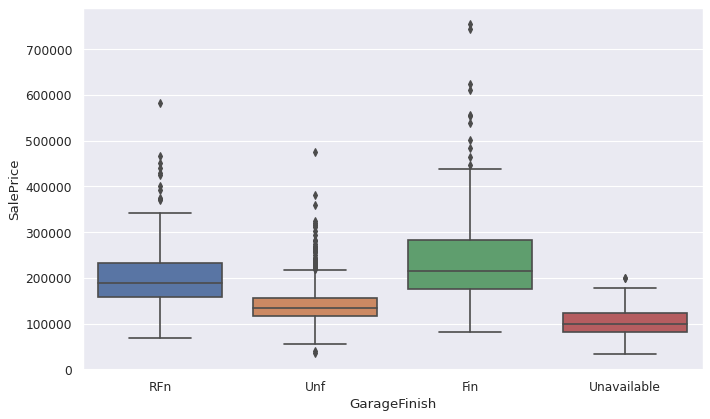

BsmtQual


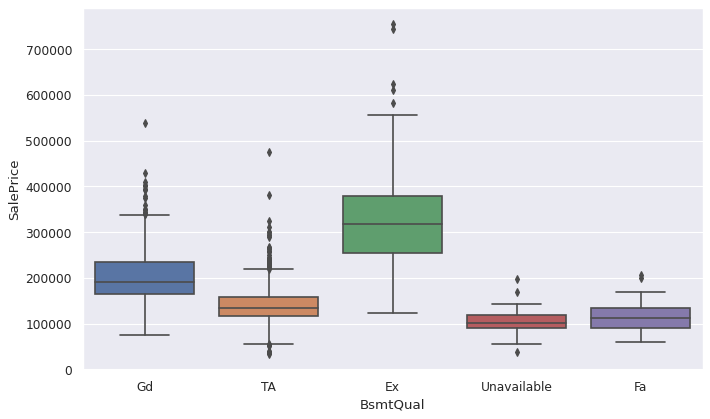

PavedDrive


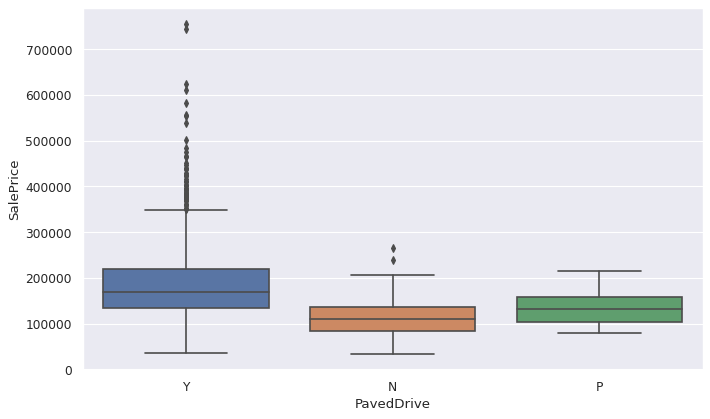

ExterQual


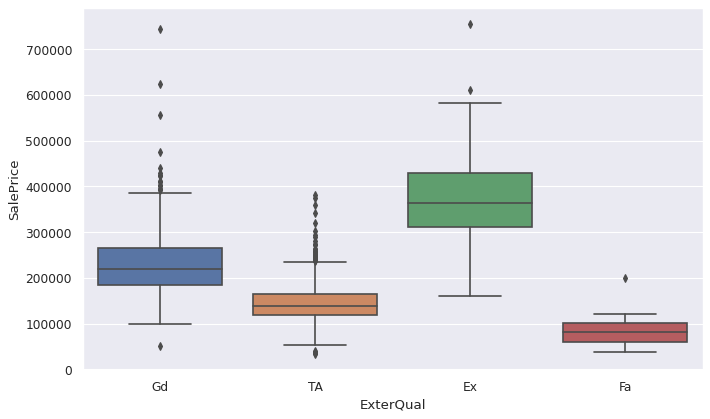

GarageType


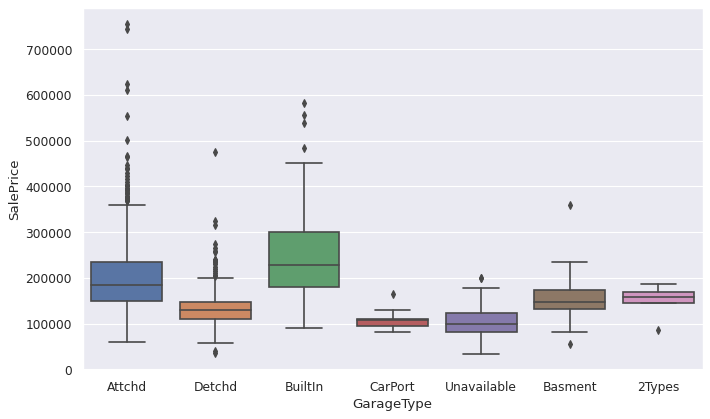

LotConfig


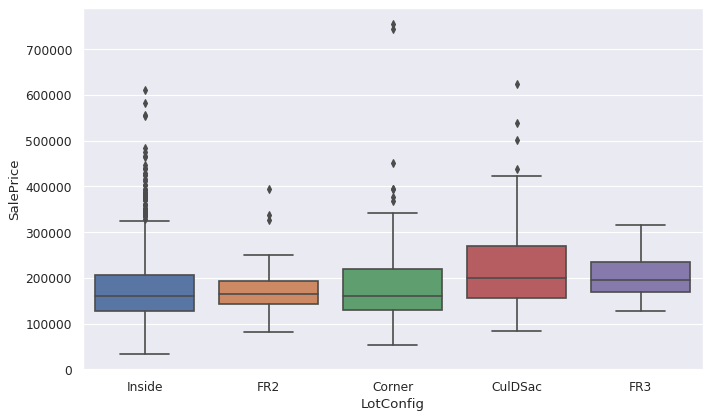

HouseStyle


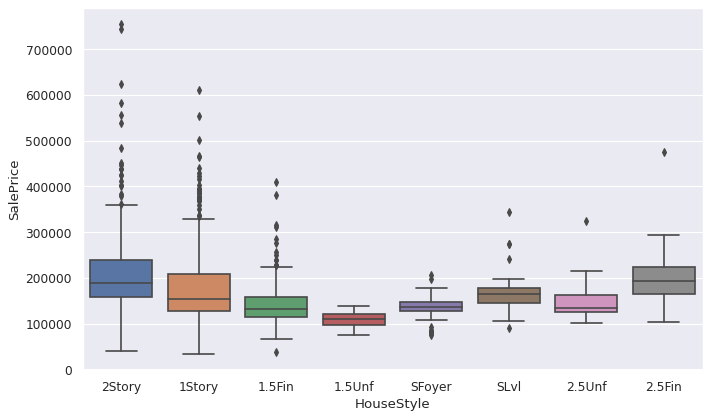

Neighborhood


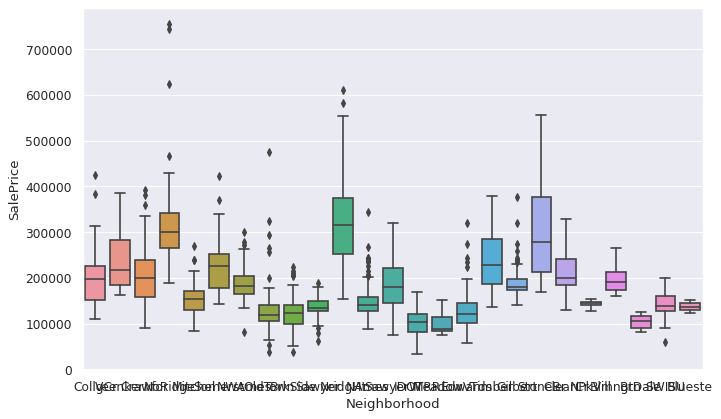

BsmtFinType1


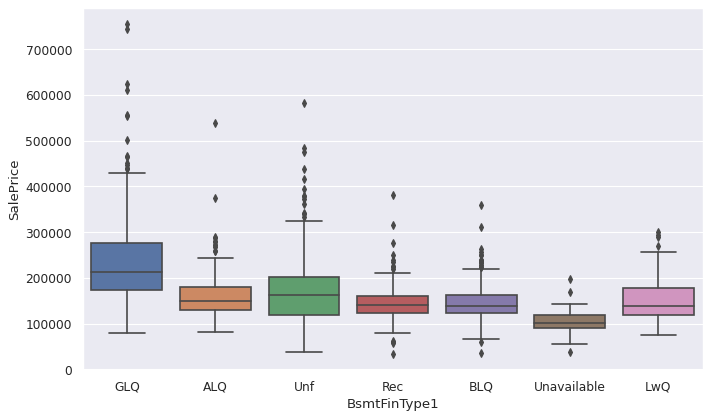

BsmtExposure


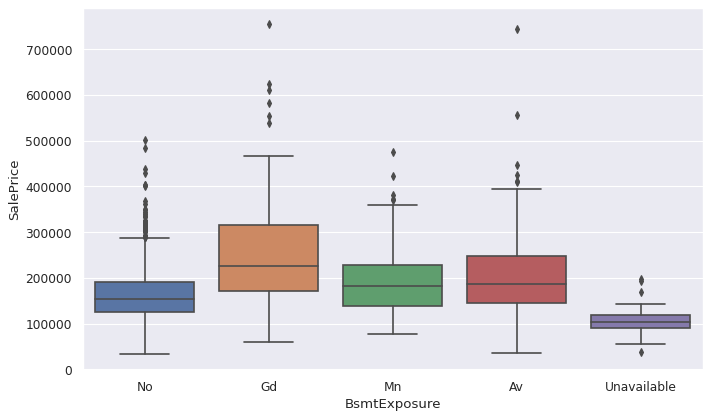

KitchenQual


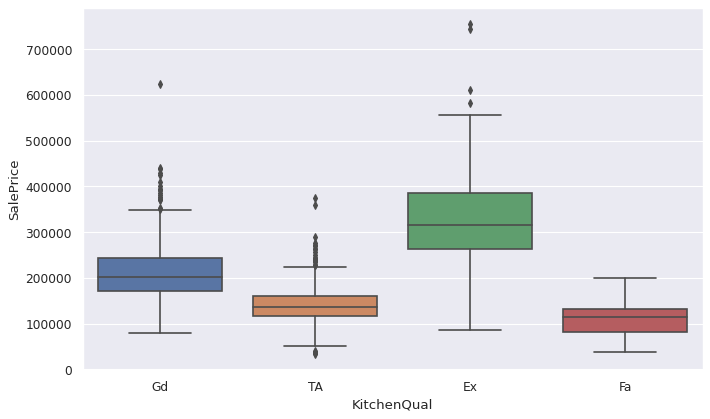

HeatingQC


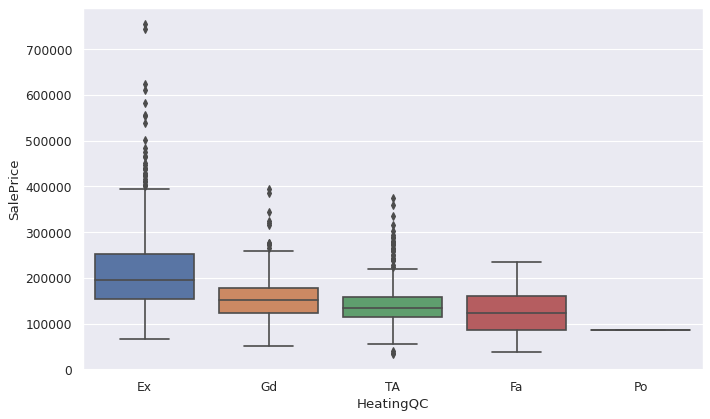

FireplaceQu


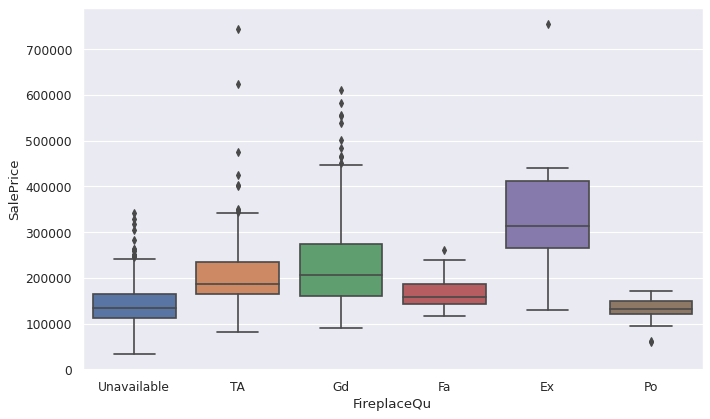

Exterior1st


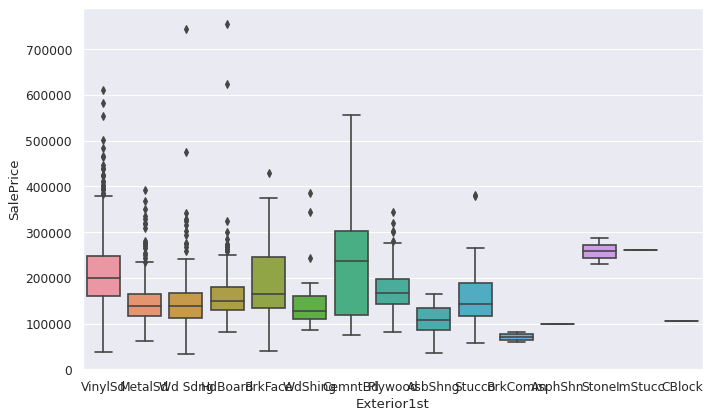

Foundation


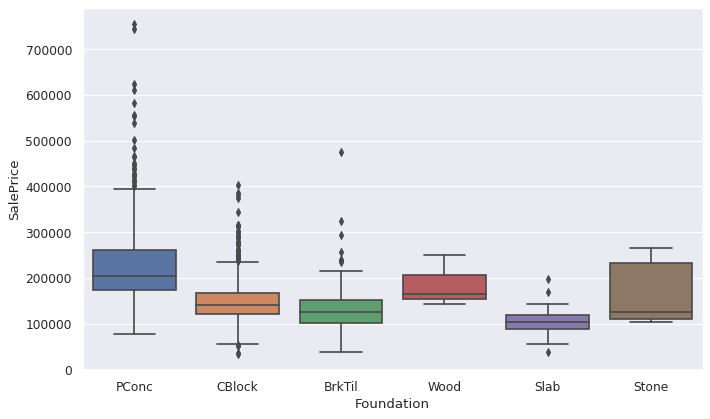

LotShape


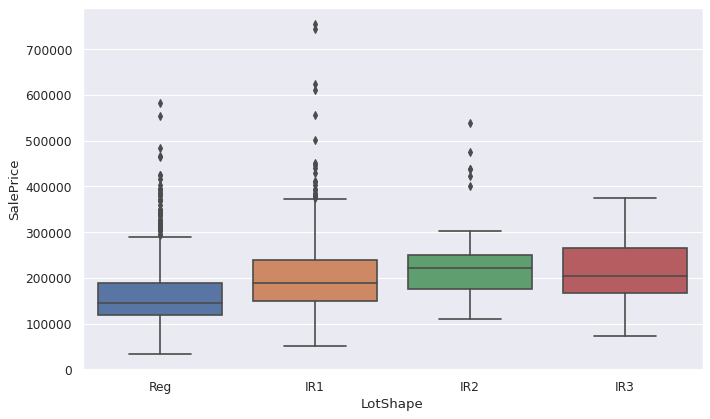

In [407]:
for col in categorical_cols:
  figure(figsize=(10, 6), dpi=80)
  print(col)
  sns.boxplot(x=col,y='SalePrice',data=data)
  plt.show()

MSSubClass


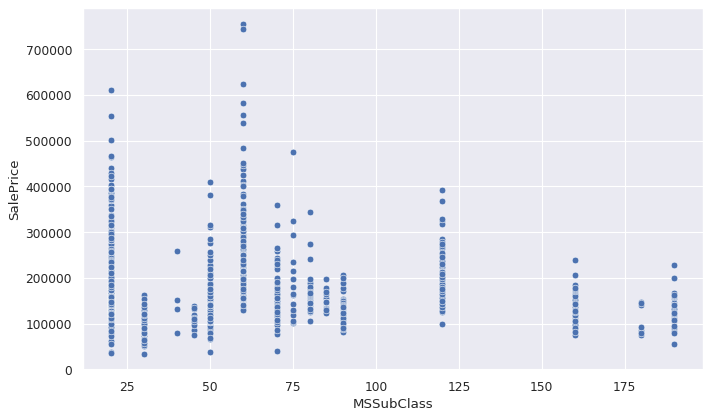

LotFrontage


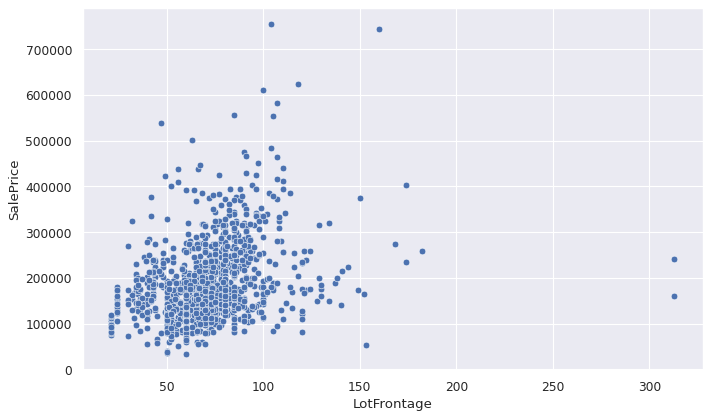

LotArea


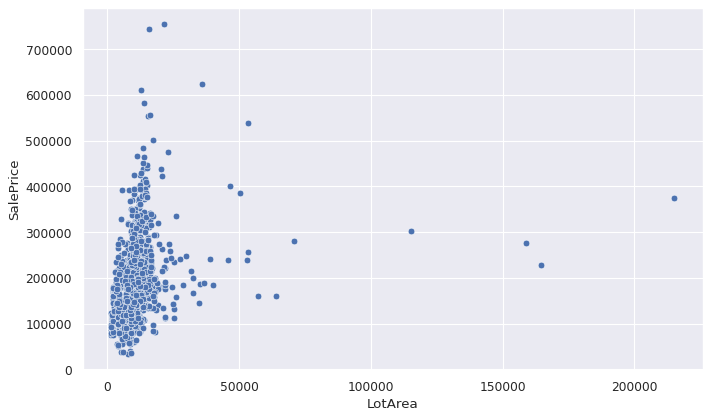

OverallQual


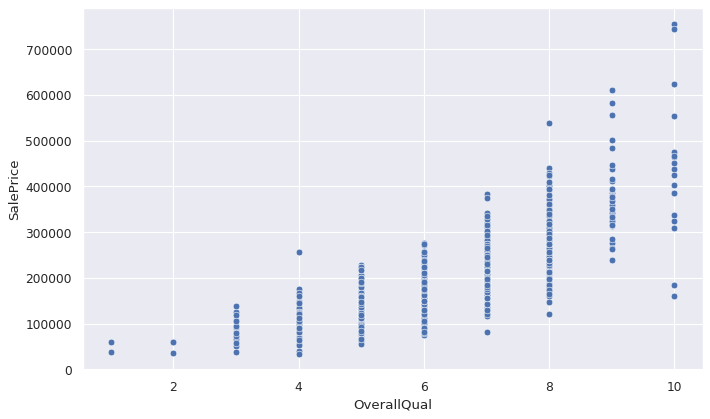

OverallCond


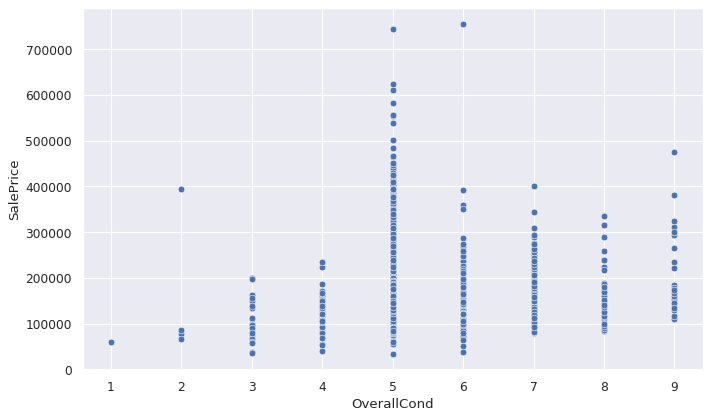

YearBuilt


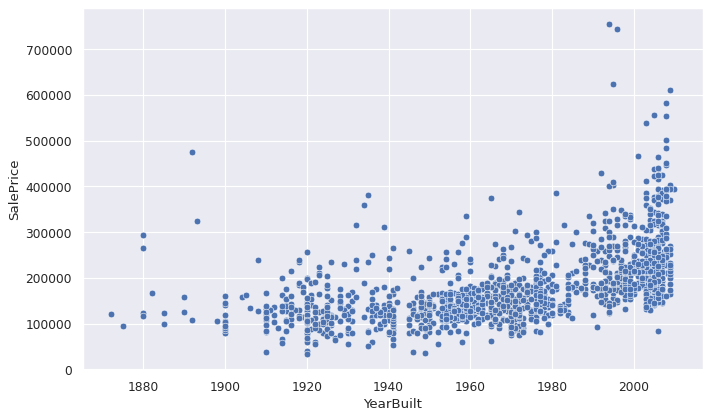

YearRemodAdd


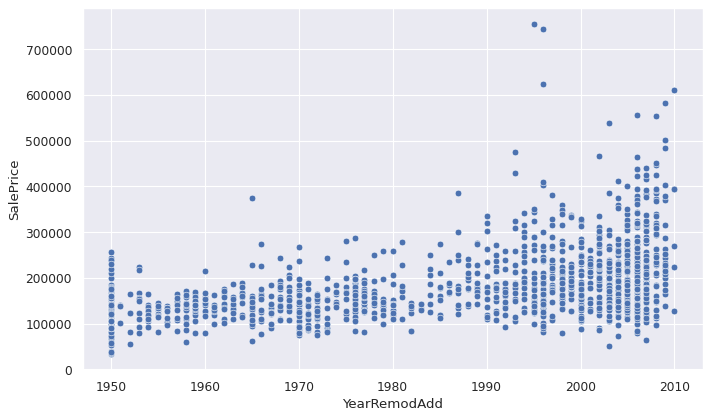

MasVnrArea


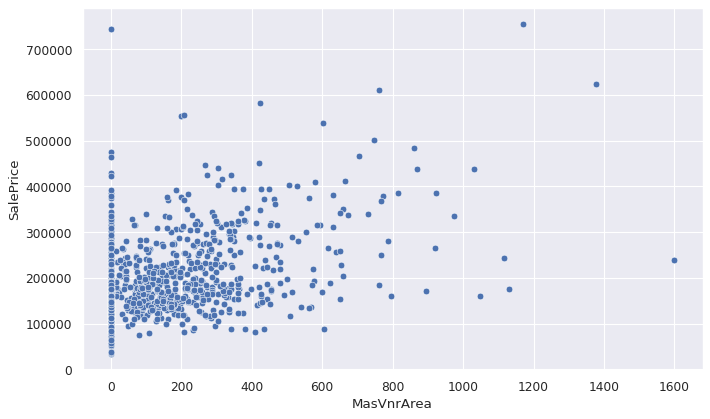

BsmtFinSF1


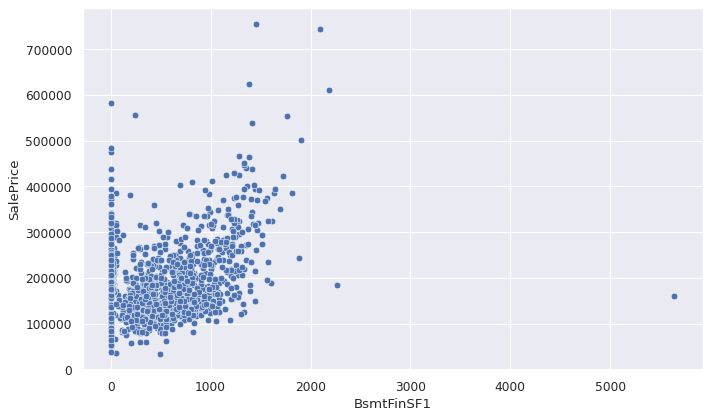

BsmtUnfSF


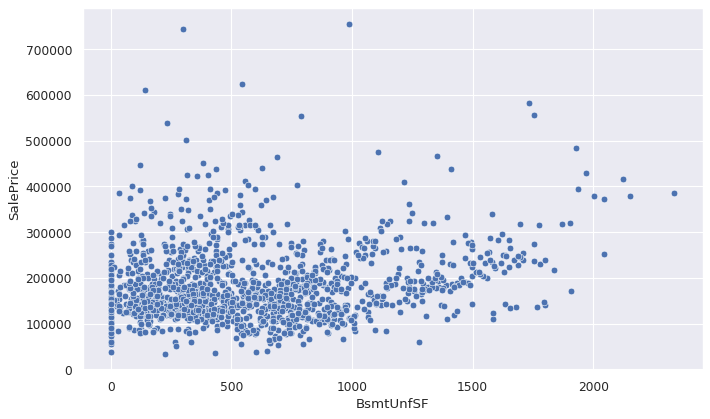

TotalBsmtSF


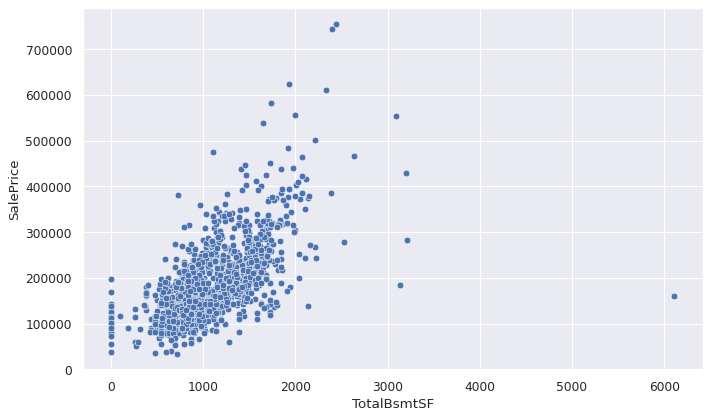

1stFlrSF


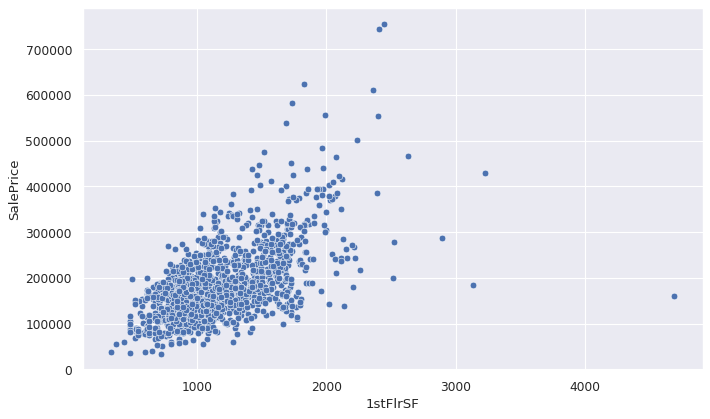

2ndFlrSF


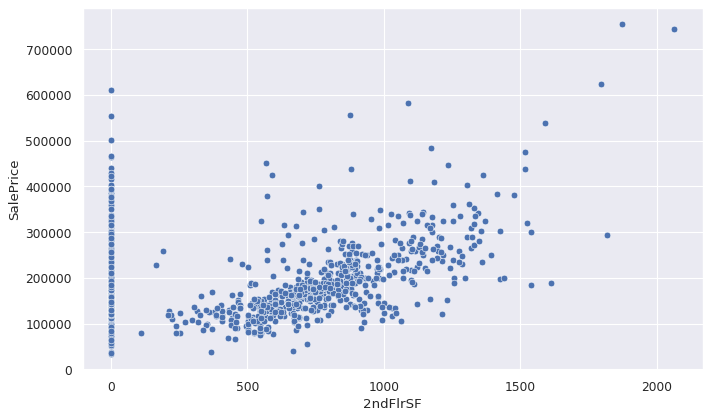

GrLivArea


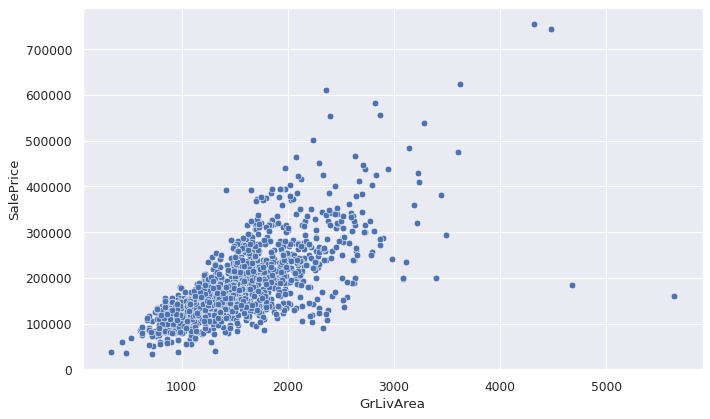

BsmtFullBath


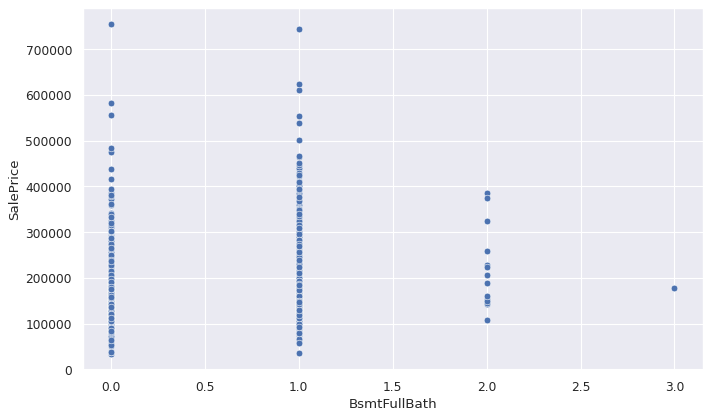

FullBath


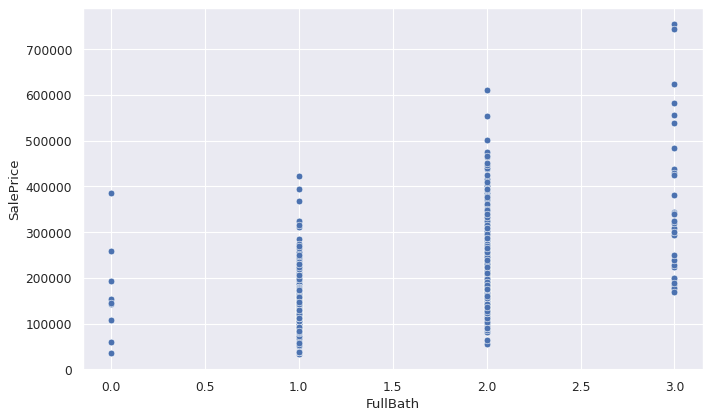

HalfBath


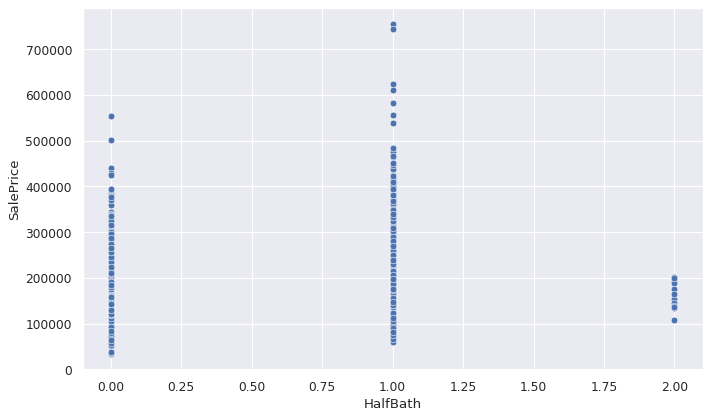

BedroomAbvGr


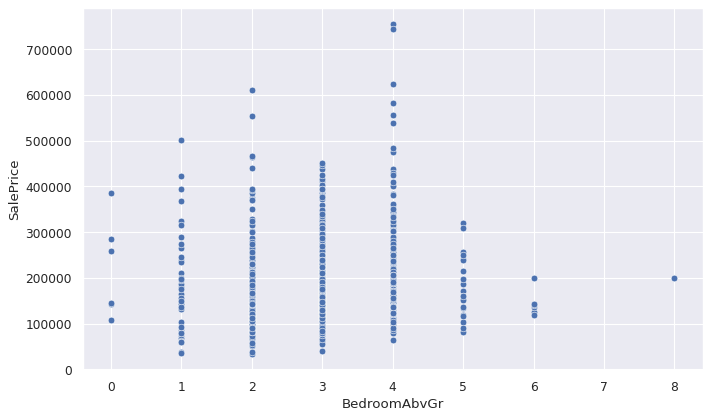

TotRmsAbvGrd


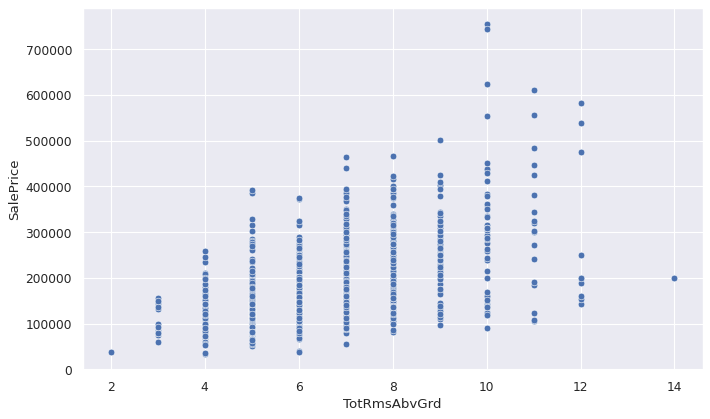

Fireplaces


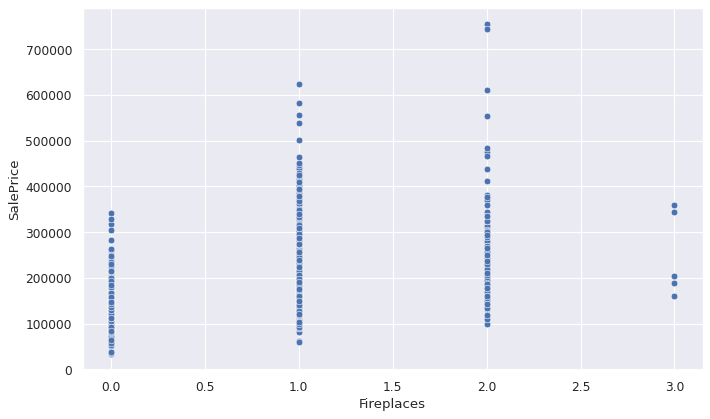

GarageYrBlt


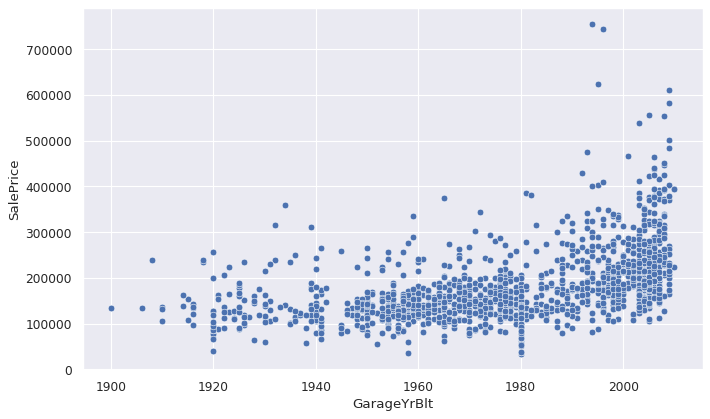

GarageCars


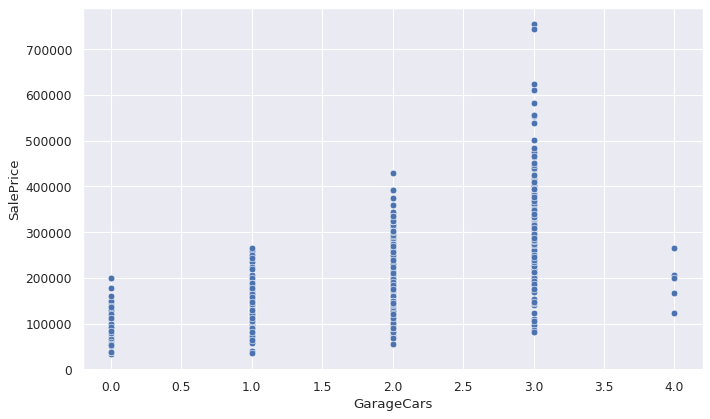

GarageArea


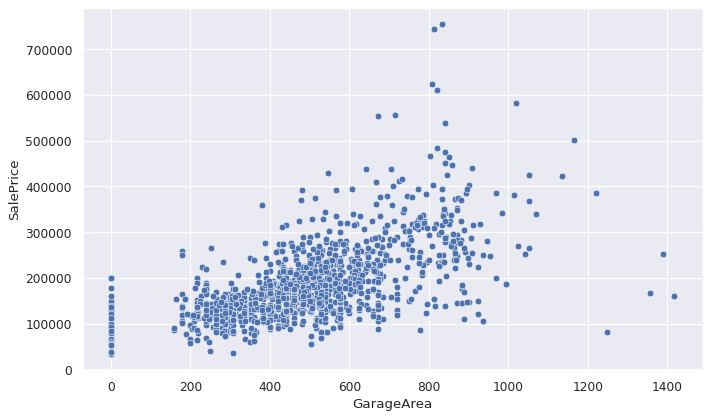

WoodDeckSF


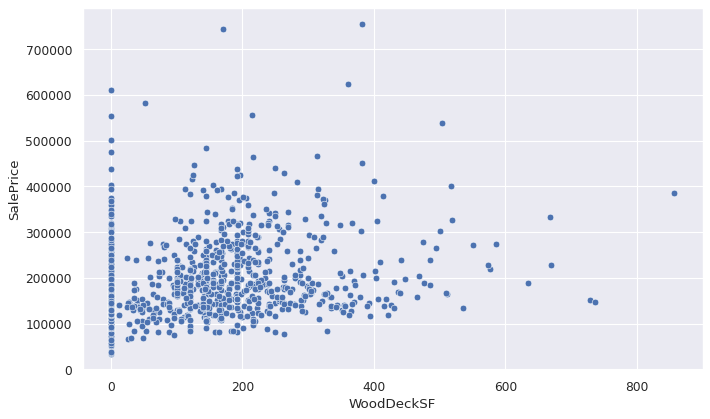

OpenPorchSF


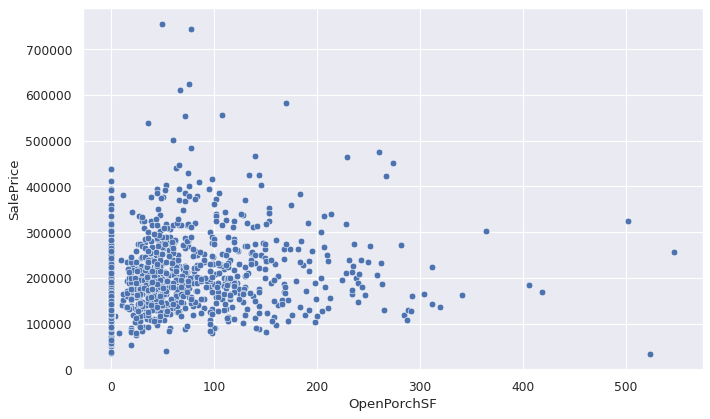

MoSold


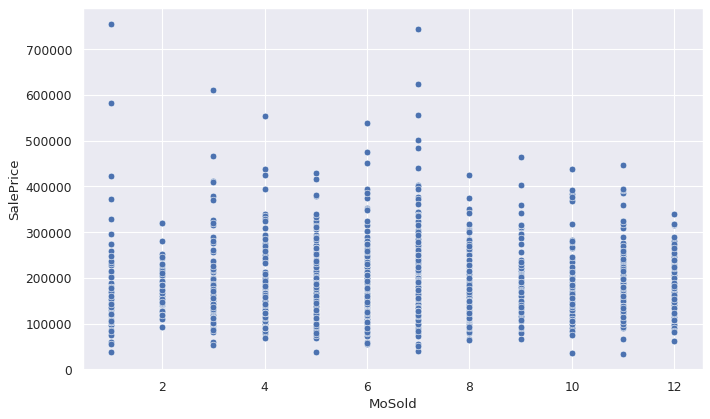

YrSold


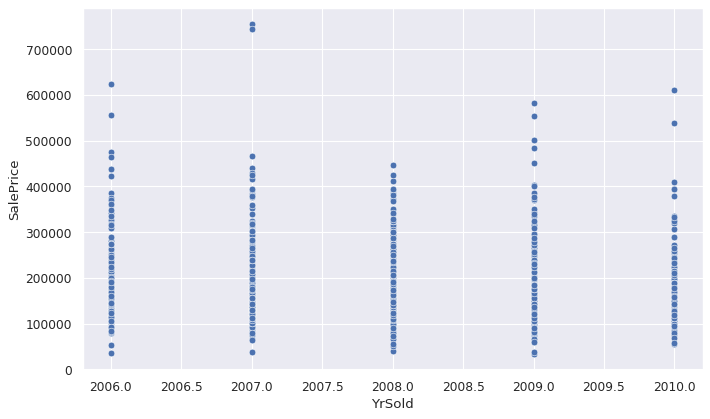

In [408]:
for col in numerical_cols:
  figure(figsize=(10, 6), dpi=80)
  print(col)
  sns.scatterplot(x=col,y='SalePrice',data=data)
  plt.show()

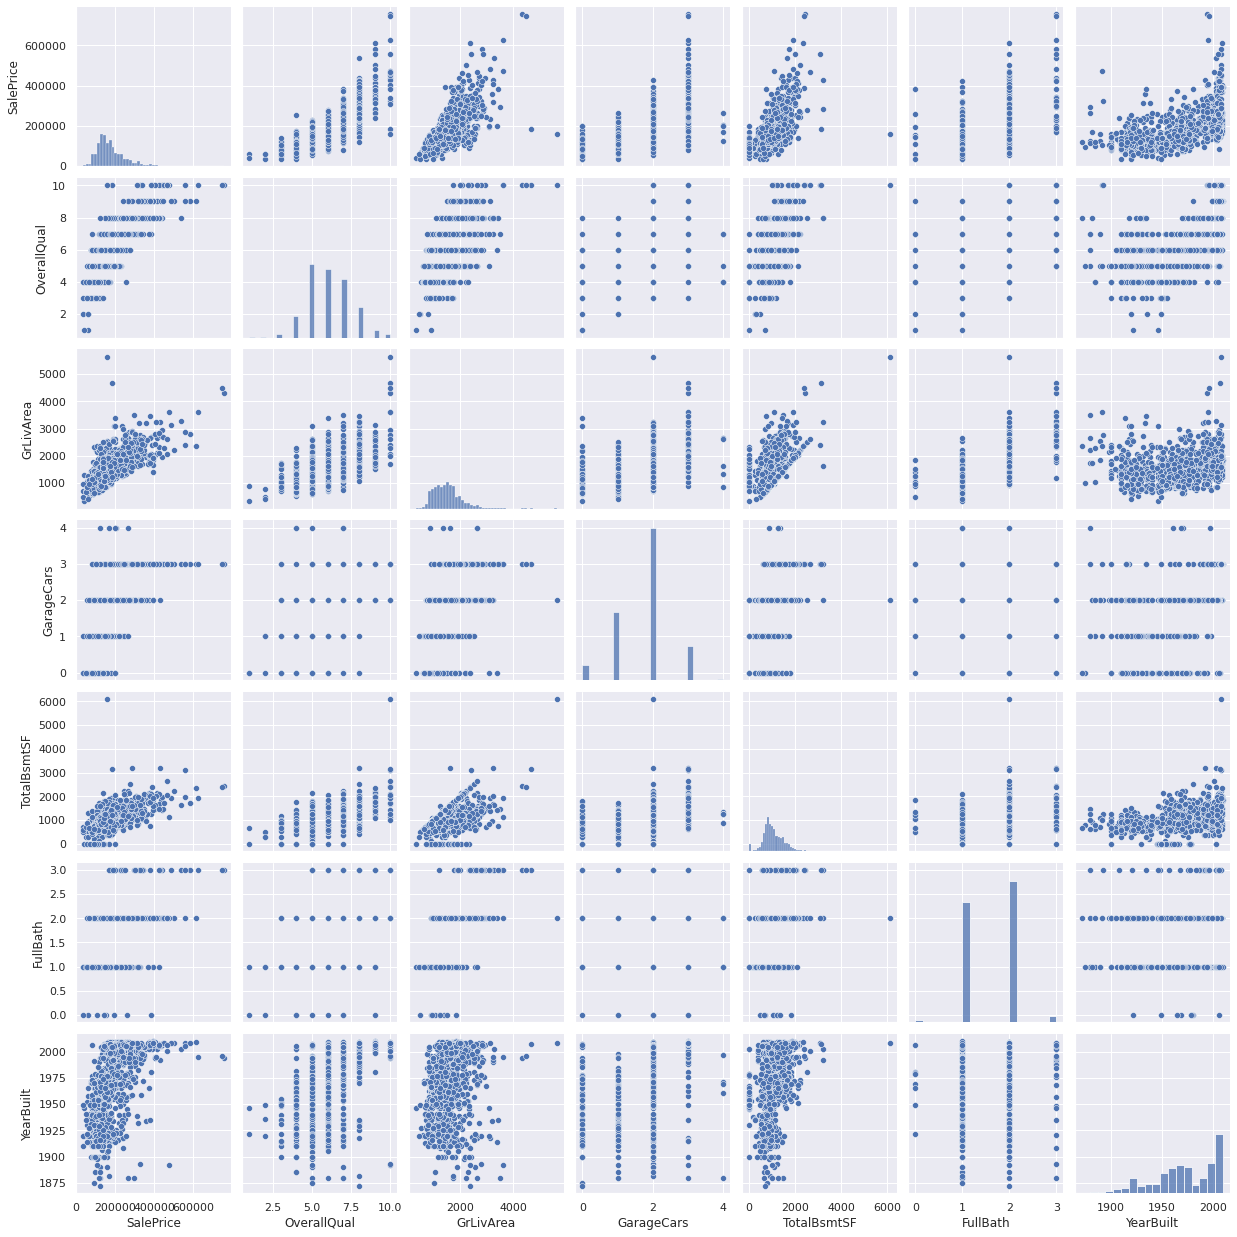

In [409]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

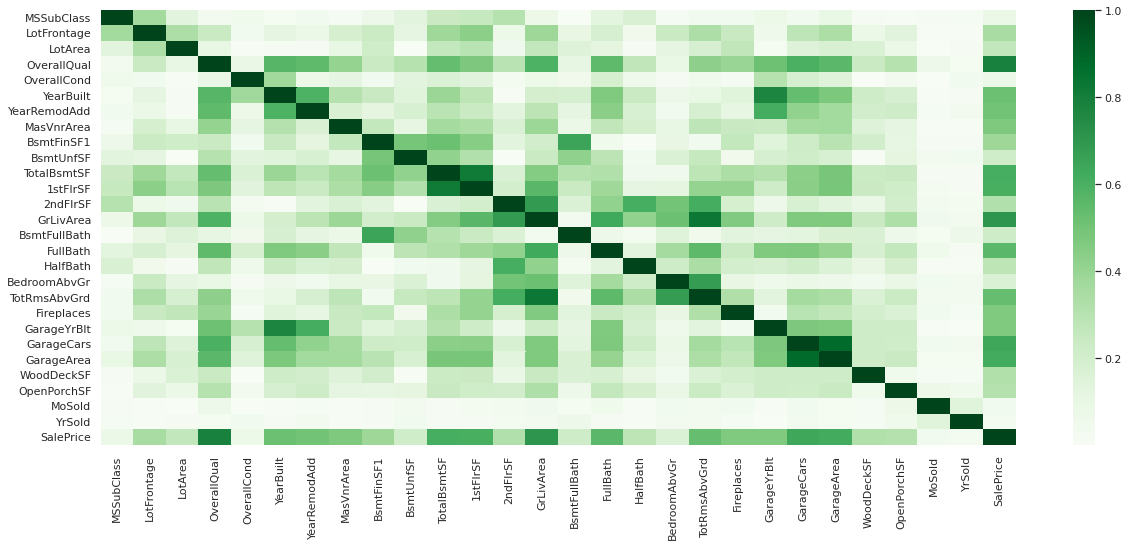

In [410]:
curr = data.corr().abs()
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.heatmap(curr, cmap="Greens")
plt.show()

In [537]:
data_dummies = pd.get_dummies(data, columns = categorical_cols,drop_first=True)
data_dummies

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,0,0,0,1,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,0,0,1,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,0,0,0,1,0,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,1,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,953,...,0,0,0,1,0,0,0,0,0,1
1456,20,85.0,13175,6,6,1978,1988,119.0,790,589,...,0,0,1,0,0,0,0,0,0,1
1457,70,66.0,9042,7,9,1941,2006,0.0,275,877,...,0,0,0,0,0,1,0,0,0,1
1458,20,68.0,9717,5,6,1950,1996,0.0,49,0,...,0,0,1,0,0,0,0,0,0,1


In [538]:
data.drop(categorical_cols, axis=1, inplace=True)

In [539]:
data[data_dummies.columns] = data_dummies

In [540]:
data.shape

(1460, 153)

In [541]:
df_train,df_test = train_test_split(data, train_size=0.7,test_size = 0.3, random_state=100)
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)
y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [542]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [543]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [544]:
rfe = RFE(estimator=reg, n_features_to_select=40)
rfe = rfe.fit(X_train, y_train)

In [545]:
X_train.columns[rfe.support_]

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageCars',
       'Exterior2nd_CBlock', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'RoofStyle_Mansard', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtQual_Unavailable', 'PavedDrive_P',
       'GarageType_Basment', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BsmtFinType1_Unavailable', 'BsmtFinType1_Unf', 'BsmtExposure_Gd',
       'KitchenQual_Fa', 'HeatingQC_Po', 'FireplaceQu_Po',
       'FireplaceQu_Unavailable', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_VinylSd', 'Foundation_Stone', 'LotShape_IR3'],
      dtype='object')

In [546]:
X_train = X_train[X_train.columns[rfe.support_]]

In [547]:
X_test = X_test[X_test.columns[rfe.support_]]

In [548]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()
model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
model.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [549]:
print(model.best_params_)
model.best_score_

{'alpha': 3.0}


-0.09715019105826851

In [550]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results = cv_results.head(20)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008316,0.006992,0.003739,0.002001,0.0001,{'alpha': 0.0001},-0.092974,-0.100482,-0.107521,-0.093013,...,-0.097707,0.005630,22,-0.094183,-0.089180,-0.088630,-0.094620,-0.094439,-0.092210,0.002708
1,0.004183,0.000112,0.002506,0.000169,0.001,{'alpha': 0.001},-0.092974,-0.100481,-0.107522,-0.093006,...,-0.097705,0.005631,21,-0.094182,-0.089181,-0.088629,-0.094620,-0.094439,-0.092210,0.002708
2,0.004400,0.000321,0.002557,0.000178,0.01,{'alpha': 0.01},-0.092964,-0.100470,-0.107530,-0.092945,...,-0.097690,0.005645,20,-0.094179,-0.089182,-0.088620,-0.094624,-0.094443,-0.092210,0.002711
3,0.005276,0.001152,0.002928,0.000474,0.05,{'alpha': 0.05},-0.092923,-0.100420,-0.107581,-0.092682,...,-0.097628,0.005710,18,-0.094166,-0.089189,-0.088592,-0.094640,-0.094459,-0.092209,0.002721
4,0.005141,0.001521,0.004604,0.003911,0.1,{'alpha': 0.1},-0.092873,-0.100364,-0.107634,-0.092381,...,-0.097556,0.005785,16,-0.094151,-0.089197,-0.088621,-0.094659,-0.094478,-0.092221,0.002715
5,0.004208,0.000075,0.002504,0.000062,0.2,{'alpha': 0.2},-0.092782,-0.100264,-0.107712,-0.092075,...,-0.097475,0.005872,15,-0.094125,-0.089211,-0.088671,-0.094692,-0.094512,-0.092243,0.002707
6,0.004239,0.000069,0.002518,0.000034,0.3,{'alpha': 0.3},-0.092695,-0.100176,-0.107763,-0.091885,...,-0.097417,0.005927,13,-0.094108,-0.089224,-0.088713,-0.094718,-0.094544,-0.092261,0.002701
7,0.004155,0.000032,0.002484,0.000029,0.4,{'alpha': 0.4},-0.092612,-0.100106,-0.107792,-0.091867,...,-0.097394,0.005945,12,-0.094092,-0.089237,-0.088747,-0.094741,-0.094572,-0.092278,0.002696
8,0.004274,0.000126,0.002526,0.000101,0.5,{'alpha': 0.5},-0.092536,-0.100046,-0.107804,-0.091844,...,-0.097370,0.005958,11,-0.094078,-0.089309,-0.088786,-0.094764,-0.094596,-0.092307,0.002676
9,0.008995,0.005069,0.002715,0.000217,0.6,{'alpha': 0.6},-0.092465,-0.099991,-0.107804,-0.091814,...,-0.097345,0.005968,9,-0.094066,-0.089381,-0.088823,-0.094785,-0.094620,-0.092335,0.002656


Build optimal model

In [551]:
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.09224466,  0.0585422 ,  0.074902  ,  0.13925694,  0.05321204,
       -0.01664905,  0.1178134 ,  0.13742561,  0.18450677,  0.06798911,
        0.03794655, -0.07215914, -0.07851895, -0.09531988, -0.12501136,
        0.05118923, -0.05193286,  0.0117921 , -0.05238337,  0.13501078,
        0.04207306,  0.13380227, -0.06732806,  0.11182552,  0.11127109,
        0.1413801 ,  0.10378206,  0.06468526, -0.12501136, -0.06384516,
        0.08697342, -0.05003627, -0.0485495 , -0.06684984, -0.06667081,
        0.10656862, -0.01664905,  0.05175236,  0.04817771, -0.07534834])

In [552]:
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.8850822571678838


In [553]:
y_test_pred = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8751977028567381


Lasso

In [554]:
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()
model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [555]:
res = pd.DataFrame(model.cv_results_)


In [556]:
print(model.best_params_)
print(model.best_score_)

{'alpha': 0.0001}
-0.0973004258449817


In [557]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [558]:
y_train_pred = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.8878926366249407


In [559]:
y_test_pred = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8760251205290401


In [560]:
lasso.coef_

array([ 0.08570304,  0.05719072,  0.07108016,  0.13907557,  0.05324554,
       -0.        ,  0.29298143,  0.33496389,  0.35973023,  0.24190517,
        0.03964366, -0.10121805, -0.09252892, -0.11268397, -0.28410027,
        0.04941321, -0.04380898,  0.02521295, -0.05233582,  0.15140856,
        0.04817958,  0.14275673, -0.07133544,  0.129227  ,  0.12166372,
        0.15478809,  0.12938008,  0.07707192, -0.        , -0.06306221,
        0.08681951, -0.04514219, -0.09426479, -0.07726982, -0.06662246,
        0.11539093, -0.        ,  0.05255157,  0.06392261, -0.08603625])

In [561]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [562]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,11.956688
9,BsmtUnfSF,0.184507
26,YrSold,0.141380
4,OverallCond,0.139257
8,BsmtFinSF1,0.137426
20,GarageYrBlt,0.135011
22,GarageArea,0.133802
7,MasVnrArea,0.117813
24,OpenPorchSF,0.111826
25,MoSold,0.111271


In [563]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feautre','Coef']

In [564]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feautre,Coef
0,MSSubClass,11.793605
9,BsmtUnfSF,0.359730
8,BsmtFinSF1,0.334964
7,MasVnrArea,0.292981
10,TotalBsmtSF,0.241905
26,YrSold,0.154788
20,GarageYrBlt,0.151409
22,GarageArea,0.142757
4,OverallCond,0.139076
27,SalePrice,0.129380


In [464]:
# data.drop(['MSSubClass','BsmtUnfSF',"BsmtFinSF1",'MasVnrArea','TotalBsmtSF'], axis=1, inplace=True)